### Imports

In [ ]:
import numpy as np
import cv2
cv2.__version__

### Charger et afficher une image avec OpenCV

In [ ]:
img = cv2.imread("Crew_Dragon.jpg")
# ou
# img = cv2.imread("PI_TD1/Crew_Dragon.jpg", cv2.IMREAD_COLOR)  # Ne pas garder le canal alpha
# ou
gray = cv2.imread("Crew_Dragon.jpg", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Image of Crew Dragon", img)
k = cv2.waitKey(0)
if k == ord("c"):
    cv2.destroyAllWindows()
else:
    print(k)

In [ ]:
cv2.imshow("Image of Crew Dragon", img)
print(cv2.waitKey(0))
cv2.destroyAllWindows()

In [ ]:
cv2.imshow("Gray level image of Crew Dragon", gray)
print(cv2.waitKey(0))
cv2.destroyAllWindows()

### Afficher une image avec Matplotlib

In [ ]:
import matplotlib.pyplot as plt

# Convertir l'image vers le format lu par matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Image of Crew Dragon")
plt.show()

In [ ]:
plt.imshow(gray, cmap='gray')
plt.title("Gray level image of Crew Dragon")
plt.show()

### Couper et redimensionner une image

In [16]:
# Obtenir les dimensions d'une image
print(img.shape) # (h, w, c)
print(gray.shape) # (h, w)

(683, 1024, 3)
(683, 1024)


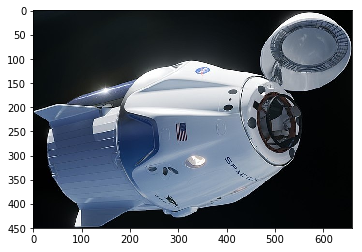

In [16]:
cropped = img_rgb[90:540, 180:840,:]

plt.imshow(cropped)
plt.show()

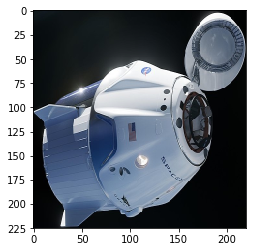

In [21]:
h = cropped.shape[0]
w = cropped.shape[1]

new_h = h//2
new_w = w//3

resized = cv2.resize(cropped, (new_w, new_h), interpolation = cv2.INTER_AREA)

plt.imshow(resized)
plt.show()

### Appliquer une rotation sur une image

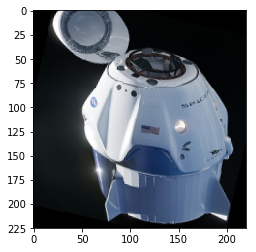

In [22]:
rotationMatrix = cv2.getRotationMatrix2D((new_w/2, new_h/2), 77, 1)
rotated = cv2.warpAffine(resized, rotationMatrix, (new_w, new_h))

plt.imshow(rotated)
plt.show()

### Appliquer une translation sur une image

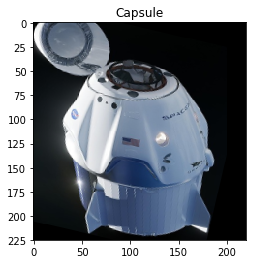

In [23]:
translationMatrix = np.float32([[1, 0, -20],
                                #20px vers la gaauche
                                [0, 1,   0]])
translated = cv2.warpAffine(rotated, translationMatrix, (new_w, new_h))

plt.imshow(translated, cmap='gray')
plt.title("Capsule"),
plt.show()

### Enregistrer une image

In [24]:
capsule_bgr = cv2.cvtColor(translated, cv2.COLOR_RGB2BGR)
cv2.imwrite("capsule.jpg", capsule_bgr)

True

### Trouver les bords dans une image

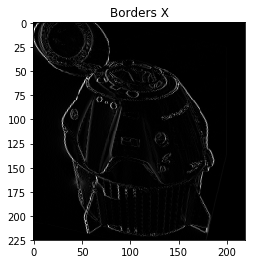

In [25]:
capsule = translated.copy()
gray_capsule = cv2.cvtColor(translated, cv2.COLOR_RGB2GRAY)

gray_capsule = np.array(gray_capsule, dtype=np.int16)
borders_X = np.abs(gray_capsule[:, 1:] - gray_capsule[:, :-1])
borders_Y = np.abs(gray_capsule[1:, :] - gray_capsule[:-1, :])

plt.imshow(borders_X, cmap='gray')
plt.title("Borders X")
plt.show()

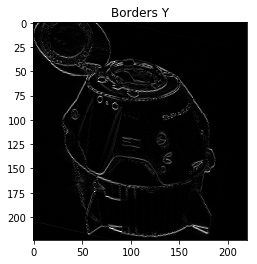

In [26]:
plt.imshow(borders_Y, cmap='gray')
plt.title("Borders Y")
plt.show()

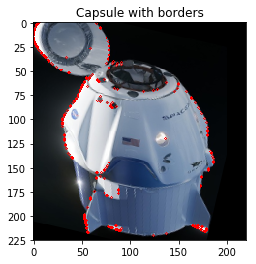

In [27]:
# Changer le threshold
threshold = 100
capsuleWithBorders = capsule.copy()

for i in range(0, capsule.shape[0]):
    for j in range(0, capsule.shape[1]-1):
        if borders_X[i,j] > threshold:
            cv2.circle(capsuleWithBorders, (j, i), 1, (255, 0, 0), 1)
for i in range(0, capsule.shape[0]-1):
    for j in range(0, capsule.shape[1]):
        if borders_Y[i,j] > threshold:
            cv2.circle(capsuleWithBorders, (j, i), 1, (255, 0, 0), 1)

plt.imshow(capsuleWithBorders)
plt.title("Capsule with borders")
plt.show()

### Trouver les coins dans une image (à l'aide d'un détecteur de Harris)

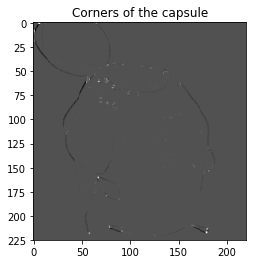

In [28]:
corners = cv2.cornerHarris(np.float32(gray_capsule),2,3,0.02)
    
plt.imshow(corners, cmap='gray')
plt.title("Corners of the capsule")
plt.show()

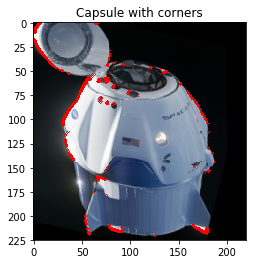

In [26]:
capsuleWithCorners = capsule.copy()
threshold = 0.08*np.max(np.abs(corners))

for i in range(0, capsule.shape[0]):
    for j in range(0, capsule.shape[1]):
        if np.abs(corners[i,j]) > threshold:
            cv2.circle(capsuleWithCorners, (j, i), 1, (255, 0, 0), 1)

plt.imshow(capsuleWithCorners)
plt.title("Capsule with corners")
plt.show()

### Trouver les correspondances entre les deux images

In [ ]:
plt.imshow(img_rgb)
plt.title("Capsule docking")
plt.show()
plt.imshow(capsule)
plt.title("Capsule")
plt.show()

In [ ]:
sift = cv2.ORB_create()
#sift = cv2.xfeatures2d.SIFT_create()

img_keypoints, img_descriptors = sift.detectAndCompute(img_rgb, None)
capsule_keypoints, capsule_descriptors = sift.detectAndCompute(capsule, None)

imgWithKeypoints = np.copy(img_rgb)
capsuleWithKeypoints = np.copy(capsule)

cv2.drawKeypoints(imgWithKeypoints, img_keypoints, imgWithKeypoints, color=(255, 0, 0))
cv2.drawKeypoints(capsuleWithKeypoints, capsule_keypoints, capsuleWithKeypoints, color=(255, 0, 0))

plt.imshow(imgWithKeypoints)
plt.title("Capsule docking with keypoints")
plt.show()
plt.imshow(capsuleWithKeypoints)
plt.title("Capsule with keypoints")
plt.show()

In [ ]:
# Trouver les correspondances entre les descripteurs
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(img_descriptors, capsule_descriptors)
matches = sorted(matches, key=lambda x : x.distance)

In [ ]:
nb_matches = 20

matched_img = cv2.drawMatches(img_rgb, img_keypoints, capsule, capsule_keypoints, matches[:20], None, flags=2)

plt.imshow(matched_img)
plt.title("Matches between the original and modified capsule images")
plt.show()

In [ ]:
# Affichage en plus grand
cv2.imshow("Matches between the original and modified capsule images", cv2.cvtColor(matched_img, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()